In [1]:
#Installing klib librarie
!pip install klib

In [ ]:
#Importing libraries
import klib
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [ ]:
nyc_taxi = pd.read_csv(r'/content/train.csv')

In [ ]:
nyc_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [ ]:
nyc_taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
60992,id2828961,1,2016-06-08 16:49:38,2016-06-08 17:29:53,1,-73.987007,40.760704,-73.978569,40.747925,N,2415.0
60993,id3750169,2,2016-01-17 07:36:00,2016-01-17 08:04:56,1,-73.776772,40.645683,-73.976341,40.727642,N,1736.0
60994,id2741554,1,2016-02-12 07:18:51,2016-02-12 07:27:16,1,-73.990891,40.733158,-73.980331,40.751186,N,505.0
60995,id1994824,1,2016-06-24 12:44:13,2016-06-24 13:04:23,1,-73.966568,40.804234,-73.902168,40.914135,N,1210.0
60996,id0506657,2,2016-01-30 20:37:34,2016-01-30 20:43:08,1,-73.986923,40.739281,-73.980949,NaN,NaN,NaN


In [ ]:
nyc_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60997 entries, 0 to 60996
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  60997 non-null  object 
 1   vendor_id           60997 non-null  int64  
 2   pickup_datetime     60997 non-null  object 
 3   dropoff_datetime    60997 non-null  object 
 4   passenger_count     60997 non-null  int64  
 5   pickup_longitude    60997 non-null  float64
 6   pickup_latitude     60997 non-null  float64
 7   dropoff_longitude   60997 non-null  float64
 8   dropoff_latitude    60996 non-null  float64
 9   store_and_fwd_flag  60996 non-null  object 
 10  trip_duration       60996 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 5.1+ MB


In [ ]:
nyc_taxi.describe(include= 'all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,60997,60997.000000,60997,60997,60997.000000,60997.000000,60997.000000,60997.000000,60996.000000,60996,60996.000000
unique,60997,NaN,60840,60859,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id0506657,NaN,2016-06-27 20:52:56,2016-03-17 11:42:30,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,2,2,NaN,NaN,NaN,NaN,NaN,60638,NaN
mean,NaN,1.531567,NaN,NaN,1.671115,-73.973507,40.751156,-73.973391,40.752004,NaN,942.337104
std,NaN,0.499007,NaN,NaN,1.319800,0.037983,0.027974,0.036514,0.032419,NaN,3043.762564
min,NaN,1.000000,NaN,NaN,1.000000,-74.393555,40.449749,-74.398514,40.444698,NaN,1.000000
25%,NaN,1.000000,NaN,NaN,1.000000,-73.991829,40.737511,-73.991348,40.735989,NaN,395.000000
50%,NaN,2.000000,NaN,NaN,1.000000,-73.981682,40.754353,-73.979713,40.754593,NaN,661.000000
75%,NaN,2.000000,NaN,NaN,2.000000,-73.967140,40.768478,-73.962830,40.769958,NaN,1075.000000


In [ ]:
nyc_taxi.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64

In [ ]:
nyc_taxi.nunique()

id                    60997
vendor_id                 2
pickup_datetime       60840
dropoff_datetime      60859
passenger_count           6
pickup_longitude      11428
pickup_latitude       22019
dropoff_longitude     13391
dropoff_latitude      24884
store_and_fwd_flag        2
trip_duration          3633
dtype: int64

GridSpec(6, 4)

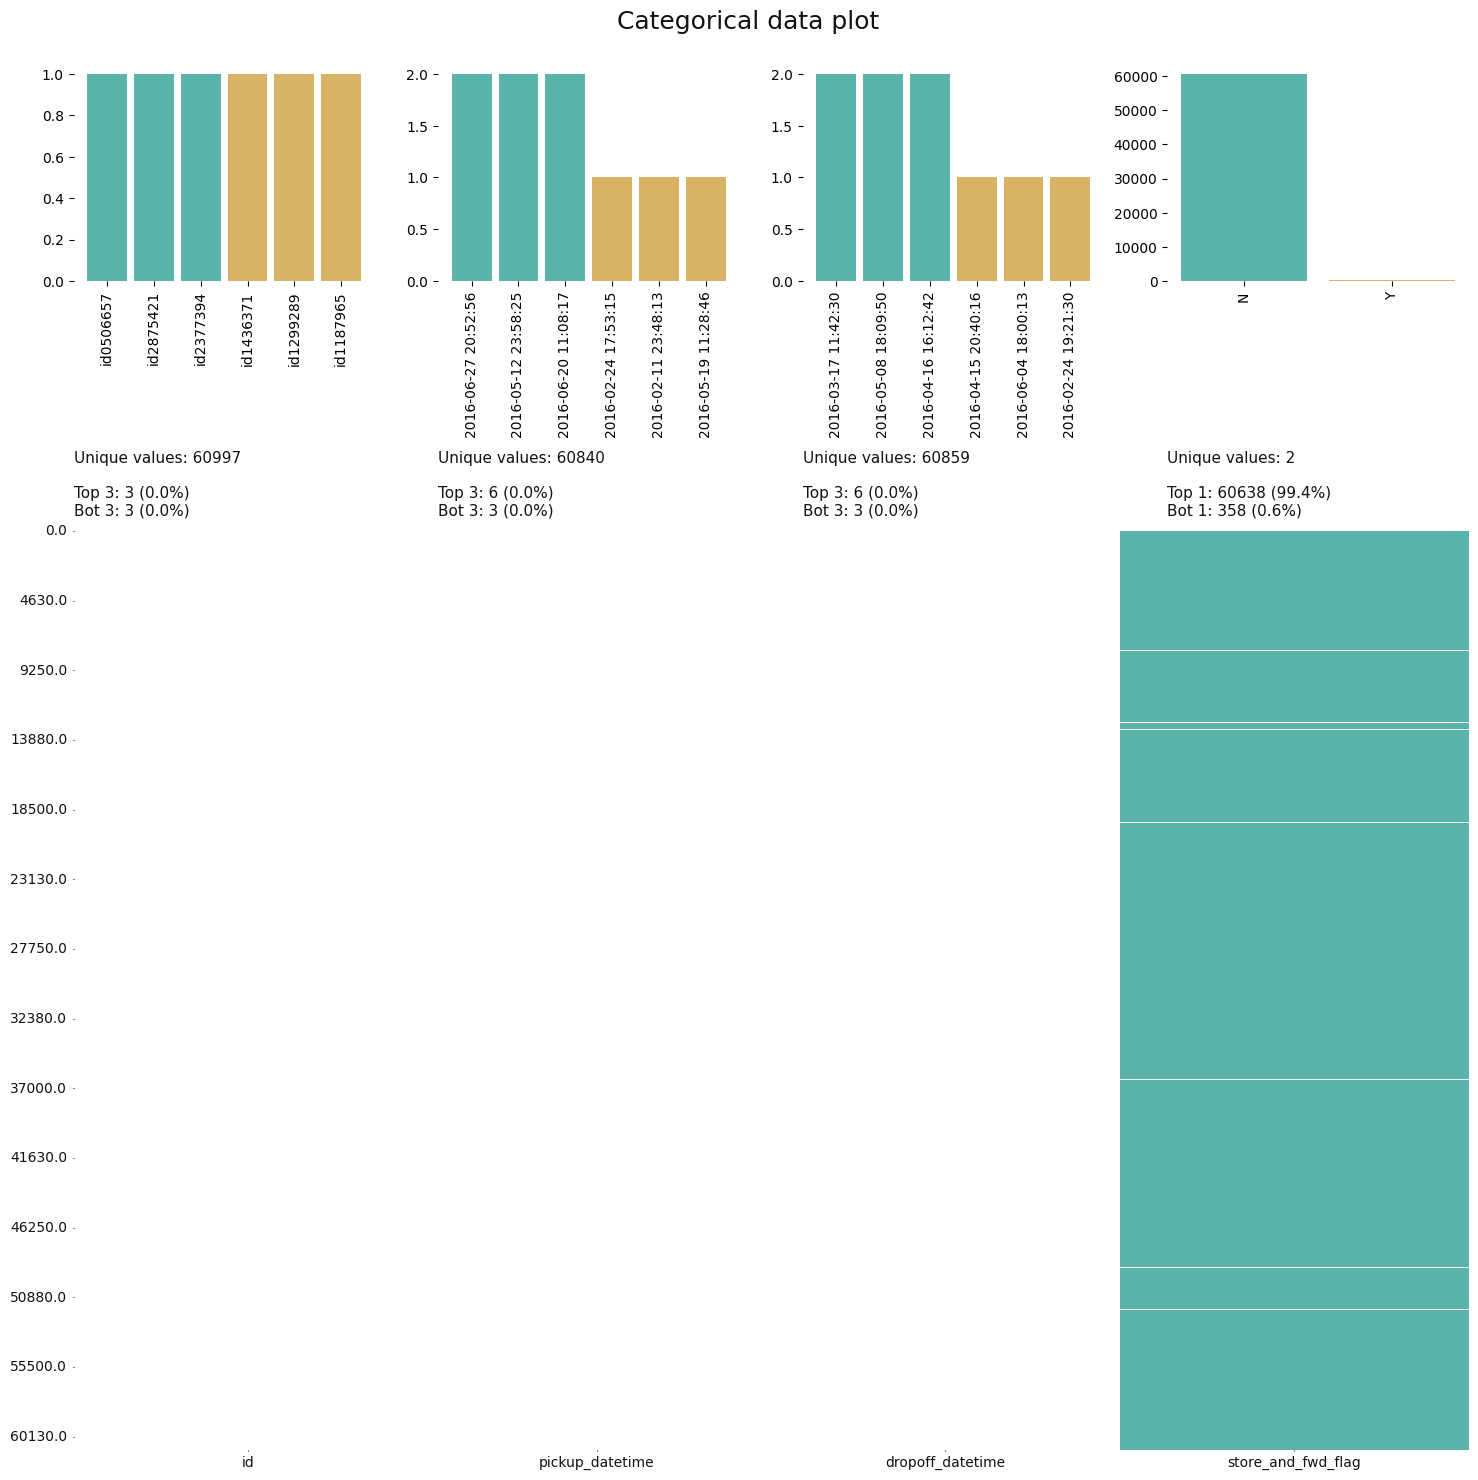

In [ ]:
klib.cat_plot(nyc_taxi)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='passenger_count', ylabel='Density'>

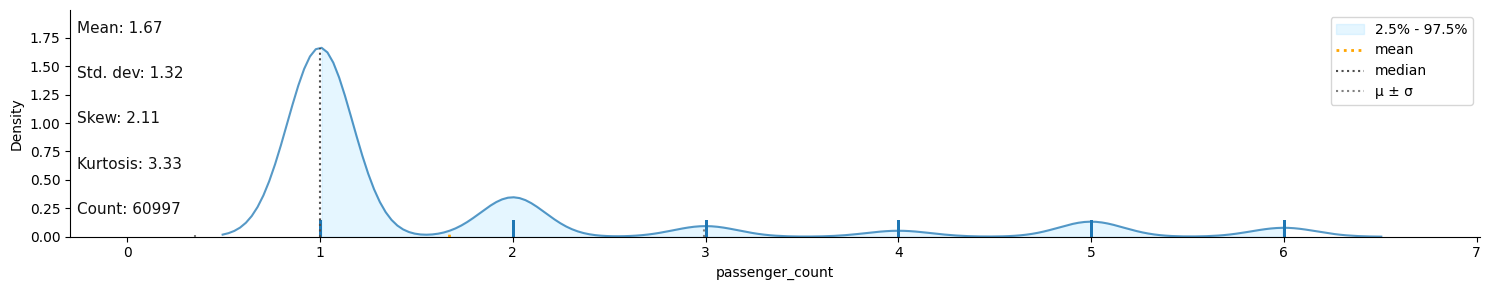

In [ ]:
klib.dist_plot(nyc_taxi)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

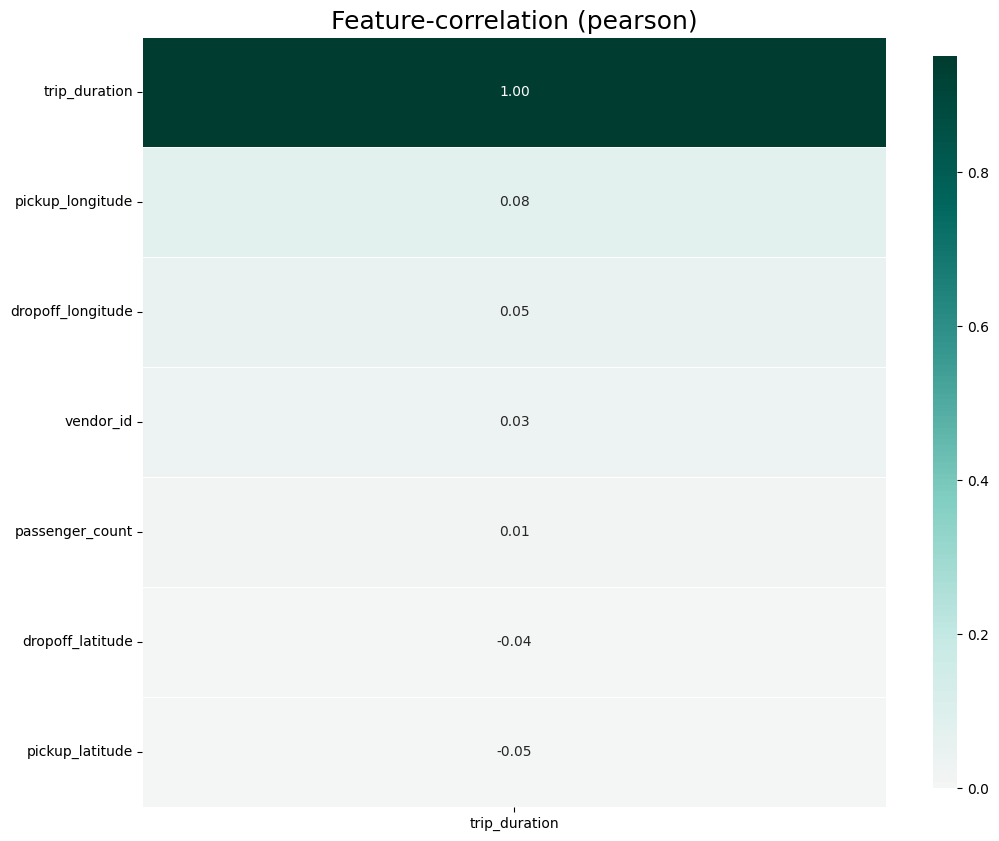

In [ ]:
klib.corr_plot(nyc_taxi, target=nyc_taxi['trip_duration'])

In [ ]:
print("Number of rows is: ", nyc_taxi.shape[0])
print("Number of columns is: ", nyc_taxi.shape[1])

Number of rows is:  60997
Number of columns is:  11


In [ ]:
nyc_taxi.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:

nyc_taxi['dropoff_datetime'] = pd.to_datetime(nyc_taxi['dropoff_datetime'])

In [ ]:
nyc_taxi['pickup_datetime'] = pd.to_datetime(nyc_taxi['pickup_datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [ ]:
nyc_taxi.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,60997.000000,60997,60997,60997.000000,60997.000000,60997.000000,60997.000000,60996.000000,60996.000000
mean,1.531567,2016-04-01 06:33:23.072151040,2016-04-01 06:49:05.399281664,1.671115,-73.973507,40.751156,-73.973391,40.752004,942.337104
min,1.000000,2016-01-01 00:08:07,2016-01-01 00:19:25,1.000000,-74.393555,40.449749,-74.398514,40.444698,1.000000
25%,1.000000,2016-02-17 08:06:49,2016-02-17 08:24:34,1.000000,-73.991829,40.737511,-73.991348,40.735989,395.000000
50%,2.000000,2016-04-01 18:14:13,2016-04-01 18:39:30,1.000000,-73.981682,40.754353,-73.979713,40.754593,661.000000
75%,2.000000,2016-05-14 19:21:06,2016-05-14 19:42:59,2.000000,-73.967140,40.768478,-73.962830,40.769958,1075.000000
max,2.000000,2016-06-30 23:45:21,2016-07-01 16:37:39,6.000000,-73.518051,41.091171,-72.711395,41.311520,86387.000000
std,0.499007,NaN,NaN,1.319800,0.037983,0.027974,0.036514,0.032419,3043.762564


In [ ]:
nyc_taxi['pickup_day']=nyc_taxi['pickup_datetime'].dt.day_name()
nyc_taxi['dropoff_day']=nyc_taxi['dropoff_datetime'].dt.day_name()

#It will convert weekday into number start at Monday=0 and end at Sunday=6.
nyc_taxi['pickup_day_no']=nyc_taxi['pickup_datetime'].dt.weekday
nyc_taxi['dropoff_day_no']=nyc_taxi['dropoff_datetime'].dt.weekday

#Extract hour only from pickup_datetime.
nyc_taxi['pickup_hour']=nyc_taxi['pickup_datetime'].dt.hour
nyc_taxi['dropoff_hour']=nyc_taxi['dropoff_datetime'].dt.hour

#Extract month in number only from pickup_datetime with January=1
nyc_taxi['pickup_month']=nyc_taxi['pickup_datetime'].dt.month
nyc_taxi['dropoff_month']=nyc_taxi['dropoff_datetime'].dt.month

In [ ]:
from geopy.distance import great_circle

In [ ]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)

 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2

def cal_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula to calculate distance between two points
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    R = 6371  # Radius of Earth in kilometers
    distance = R * c

    return distance

# Assuming 'nyc_taxi' DataFrame with columns: 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'

# Apply cal_distance function to calculate distance for each row
nyc_taxi['distance'] = nyc_taxi.apply(lambda x: cal_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

# Check for any rows with invalid or unexpected values causing errors
invalid_rows = nyc_taxi[nyc_taxi['distance'].isna()]
if not invalid_rows.empty:
    print("Warning: Found rows with invalid distance values.")

# Optionally, inspect or handle invalid rows based on your specific needs


In [ ]:
nyc_taxi['speed'] = (nyc_taxi.distance*3600/(nyc_taxi.trip_duration))

In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
nyc_taxi['pickup_timeofday'] = nyc_taxi['pickup_hour'].apply(time_of_day)
nyc_taxi['dropoff_timeofday']=nyc_taxi['dropoff_hour'].apply(time_of_day)

In [ ]:
nyc_taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,distance,speed,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,17,17,3,3,1.498521,11.856428,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,0,6,6,1.805507,9.803659,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,11,12,1,1,6.385098,10.822201,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2,2,19,19,4,4,1.485498,12.465721,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5,5,13,13,3,3,1.188588,9.836594,Afternoon,Afternoon


In [ ]:
nyc_taxi.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                float64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int32
dropoff_day_no                 int32
pickup_hour                    int32
dropoff_hour                   int32
pickup_month                   int32
dropoff_month                  int32
distance                     float64
speed                        float64
pickup_timeofday              object
dropoff_timeofday             object
dtype: object

<Axes: xlabel='trip_duration', ylabel='Count'>

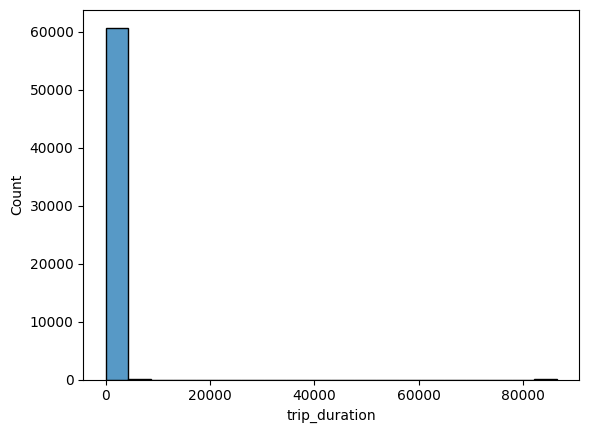

In [ ]:
sns.histplot(nyc_taxi['trip_duration'],kde=False,bins=20)

<Axes: ylabel='trip_duration'>

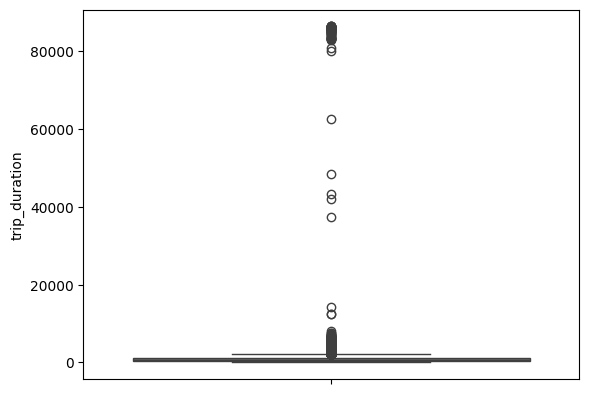

In [ ]:
sns.boxplot(nyc_taxi['trip_duration'])

In [ ]:
for i in range(0,100,10):
  duration= nyc_taxi['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1.0
10 percentile value is 244.0
20 percentile value is 347.0
30 percentile value is 443.0
40 percentile value is 546.0
50 percentile value is 661.0
60 percentile value is 798.0
70 percentile value is 971.0
80 percentile value is 1206.0
90 percentile value is 1634.0
100 percentile value is  nan


In [ ]:
for i in range(90,100):
  duration= nyc_taxi['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634.0
91 percentile value is 1703.0
92 percentile value is 1777.0
93 percentile value is 1866.0
94 percentile value is 1967.0
95 percentile value is 2103.0
96 percentile value is 2268.0
97 percentile value is 2482.0
98 percentile value is 2805.0
99 percentile value is 3388.0
100 percentile value is  nan


In [ ]:
for i in range(0,10):
  duration= nyc_taxi['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1.0
1 percentile value is 86.0
2 percentile value is 120.0
3 percentile value is 145.0
4 percentile value is 164.0
5 percentile value is 179.0
6 percentile value is 194.0
7 percentile value is 208.0
8 percentile value is 220.0
9 percentile value is 232.0
100 percentile value is  nan


In [ ]:
nyc_taxi = nyc_taxi[nyc_taxi.trip_duration <= 3400]

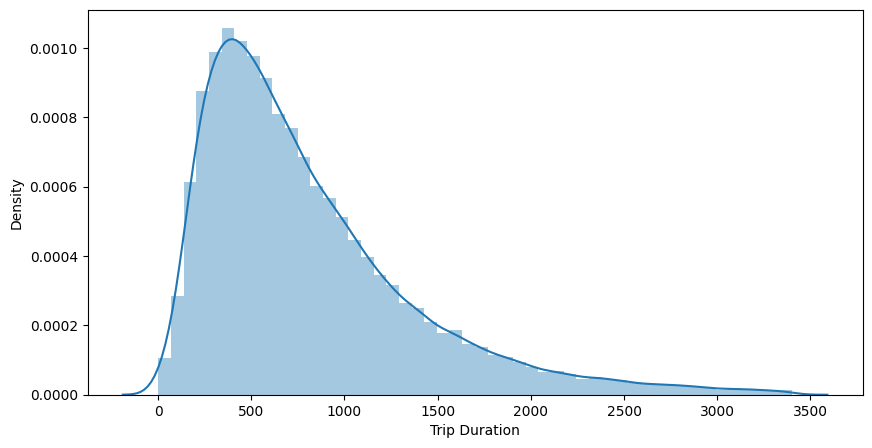

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(nyc_taxi['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

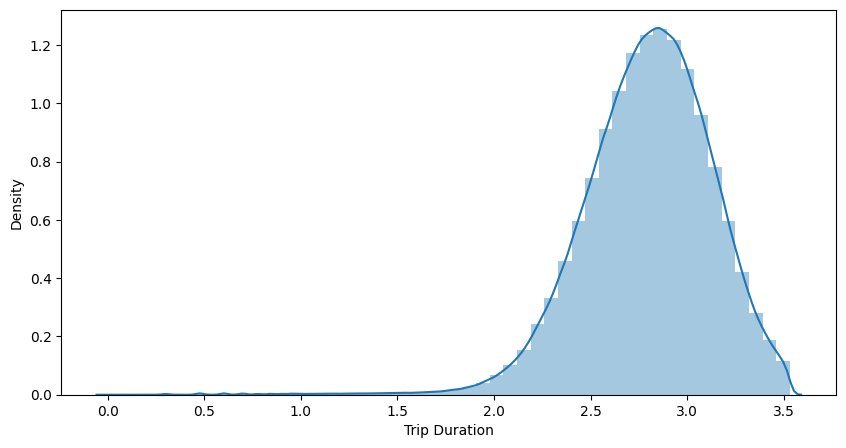

In [ ]:
#distribution plot for trip duration applying log of trip_duration
plt.figure(figsize = (10,5))
sns.distplot(np.log10(nyc_taxi['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

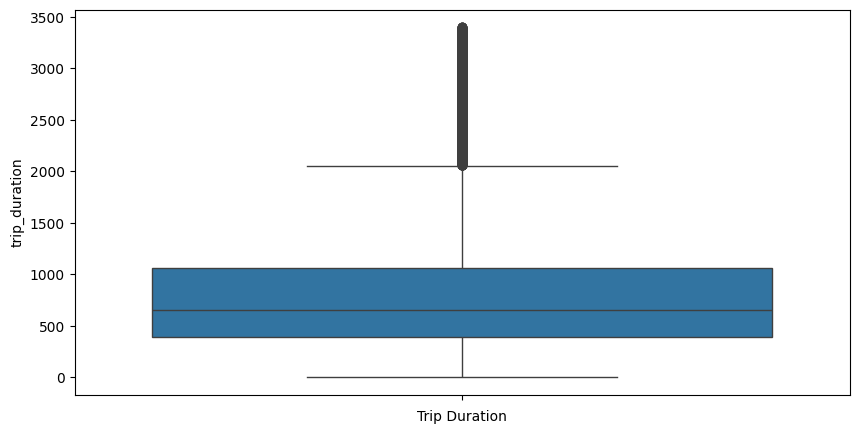

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(nyc_taxi.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

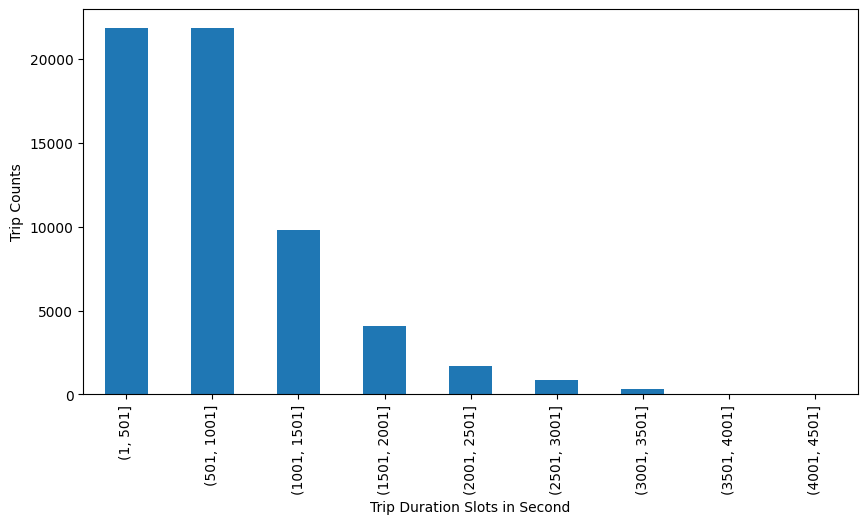

In [ ]:
plt.figure(figsize = (10,5))
nyc_taxi.trip_duration.groupby(pd.cut(nyc_taxi.trip_duration, np.arange(1,5000,500))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

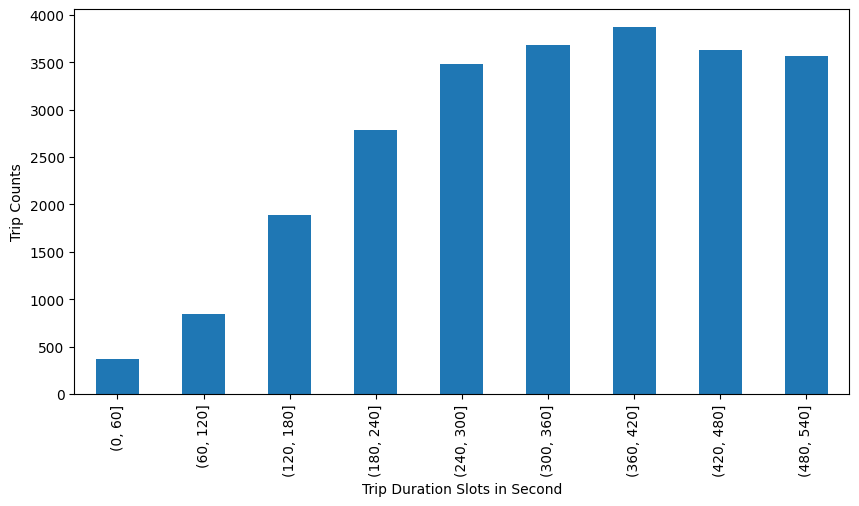

In [ ]:
plt.figure(figsize = (10,5))
nyc_taxi.trip_duration.groupby(pd.cut(nyc_taxi.trip_duration, np.arange(0,600,60))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

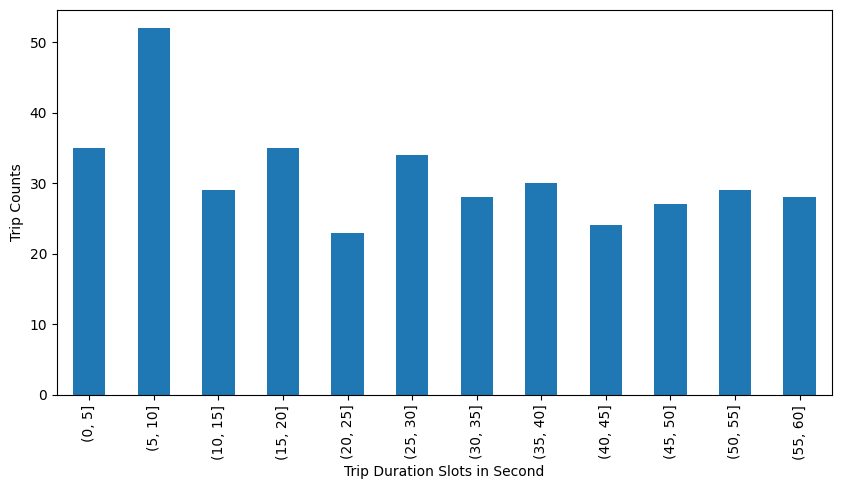

In [ ]:
plt.figure(figsize = (10,5))
nyc_taxi.trip_duration.groupby(pd.cut(nyc_taxi.trip_duration, np.arange(0,61,5))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

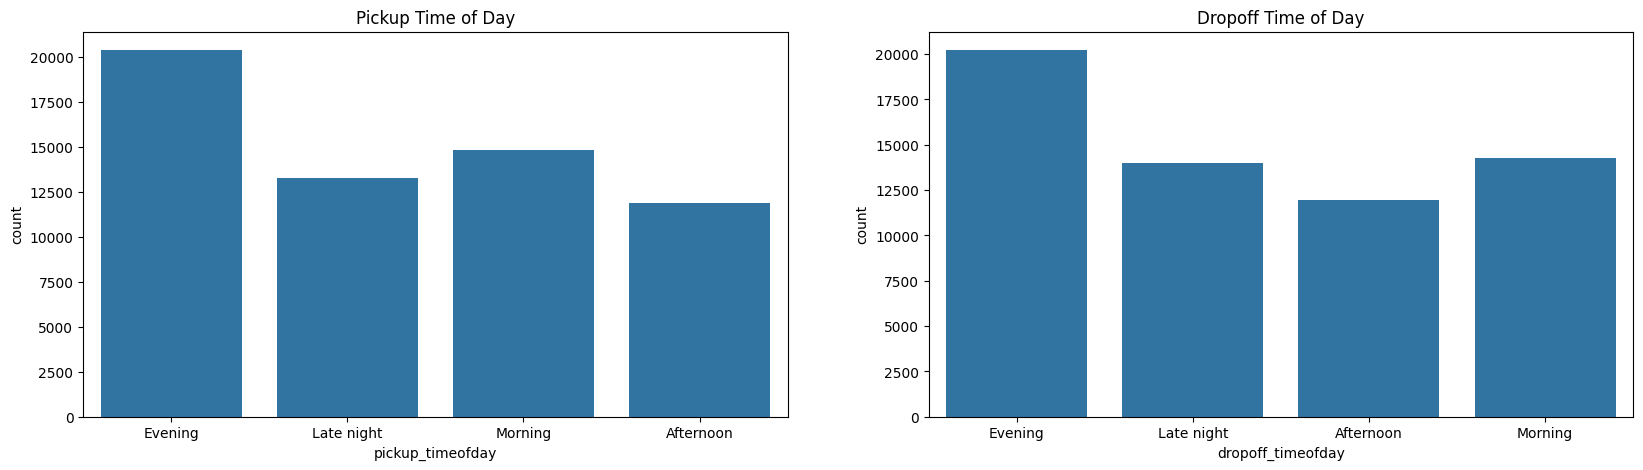

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=nyc_taxi,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=nyc_taxi,ax=ax4)

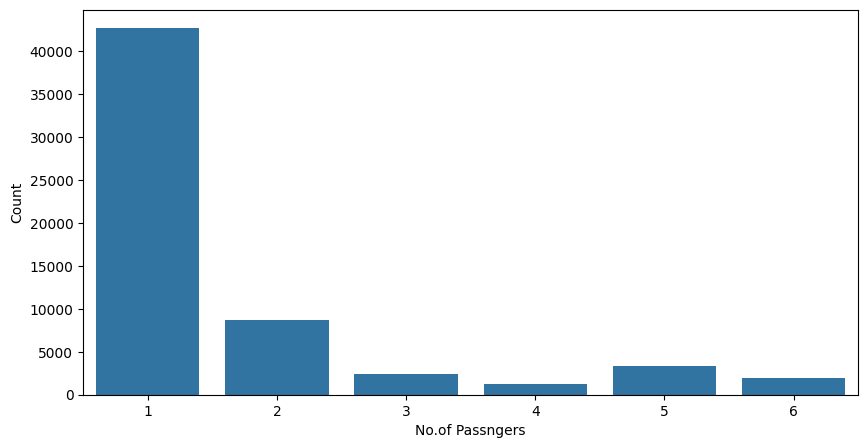

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=nyc_taxi)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

<Axes: ylabel='passenger_count'>

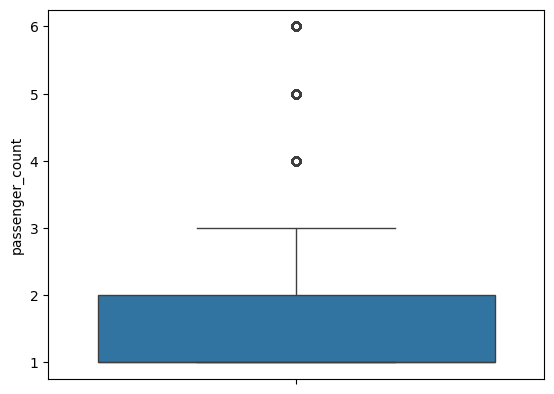

In [ ]:
  sns.boxplot(nyc_taxi['passenger_count'])

In [ ]:
no_of_passenger = nyc_taxi['passenger_count'].value_counts().reset_index()
no_of_passenger.rename(columns={'index':'no_of_passenger', 'passenger_count':'trip_counts'})

,trip_counts,count
0,1,42687
1,2,8736
2,5,3317
3,3,2448
4,6,1994
5,4,1214


In [ ]:
nyc_taxi = nyc_taxi[nyc_taxi['passenger_count'] != 0]
nyc_taxi = nyc_taxi[nyc_taxi['passenger_count']<=6]

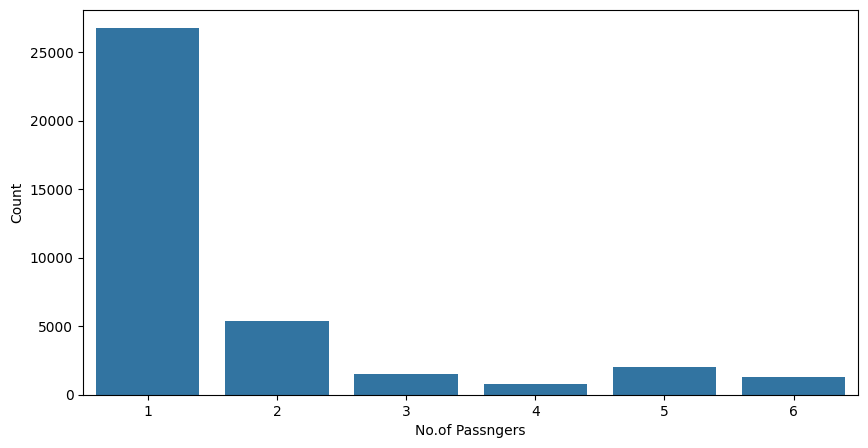

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='passenger_count',data=nyc_taxi)
plt.ylabel('Count')
plt.xlabel('No.of Passngers')
plt.show()

In [ ]:
nyc_taxi['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994278
Y    0.005722
Name: proportion, dtype: float64

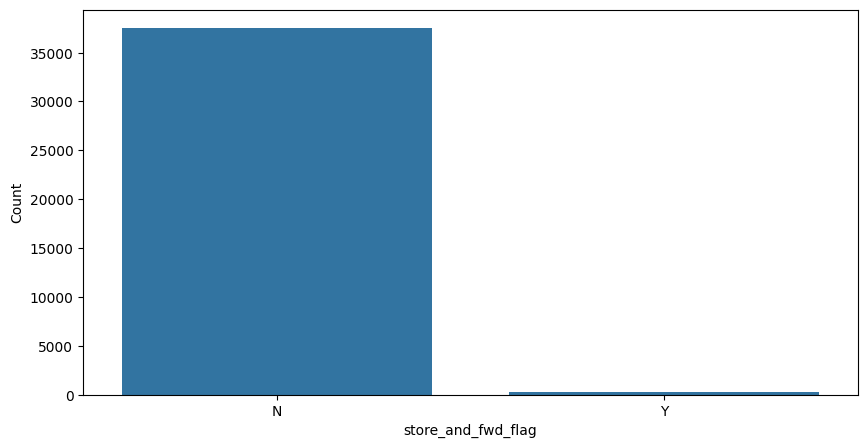

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='store_and_fwd_flag',data=nyc_taxi)
plt.ylabel('Count')
plt.xlabel('store_and_fwd_flag')
plt.show()

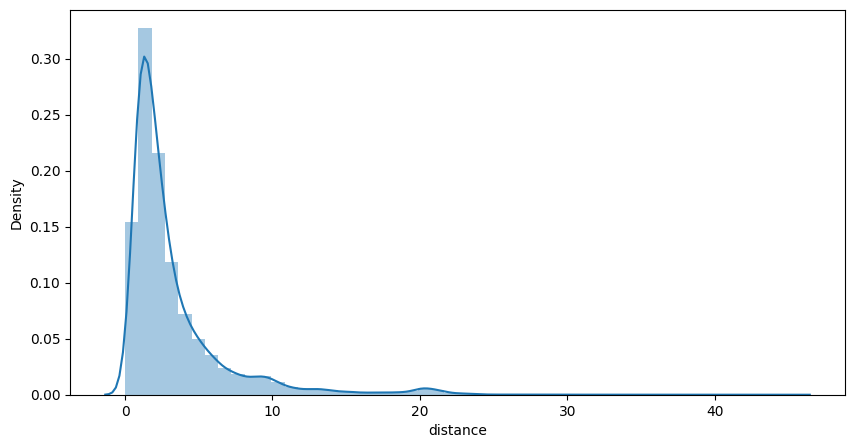

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(nyc_taxi['distance'])
plt.xlabel('distance')
plt.show()

In [ ]:
nyc_taxi = nyc_taxi[nyc_taxi['distance'] > 0.05]

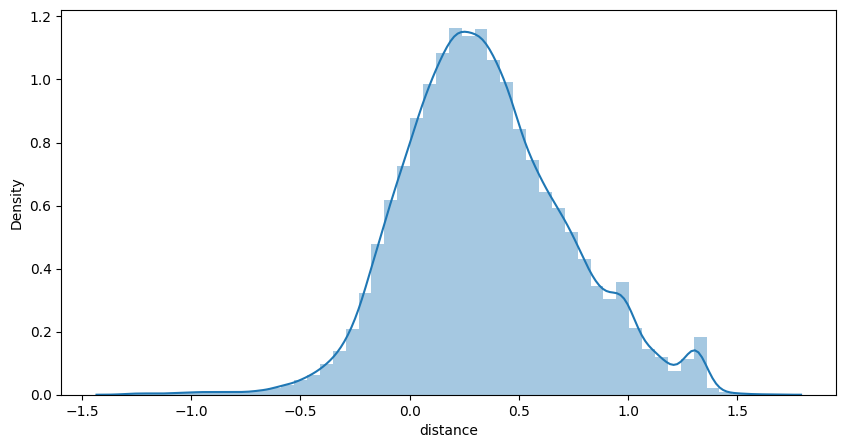

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(np.log10(nyc_taxi['distance']))
plt.xlabel('distance')
plt.show()

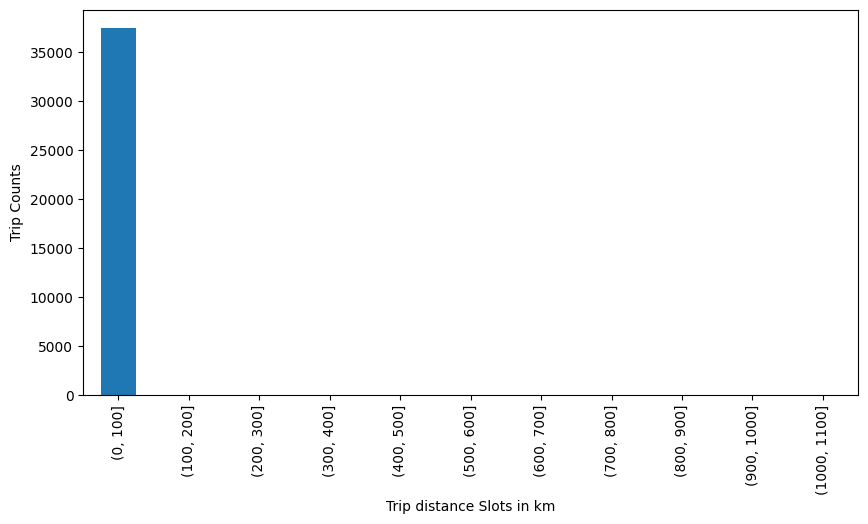

In [ ]:
plt.figure(figsize = (10,5))
nyc_taxi.distance.groupby(pd.cut(nyc_taxi.distance, np.arange(0,1200,100))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

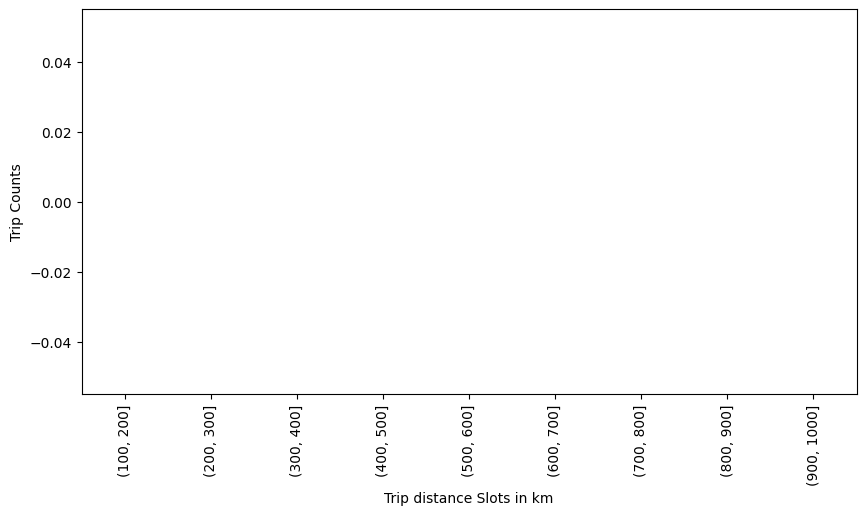

In [ ]:
plt.figure(figsize = (10,5))
nyc_taxi.distance.groupby(pd.cut(nyc_taxi.distance, np.arange(100,1001,100))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

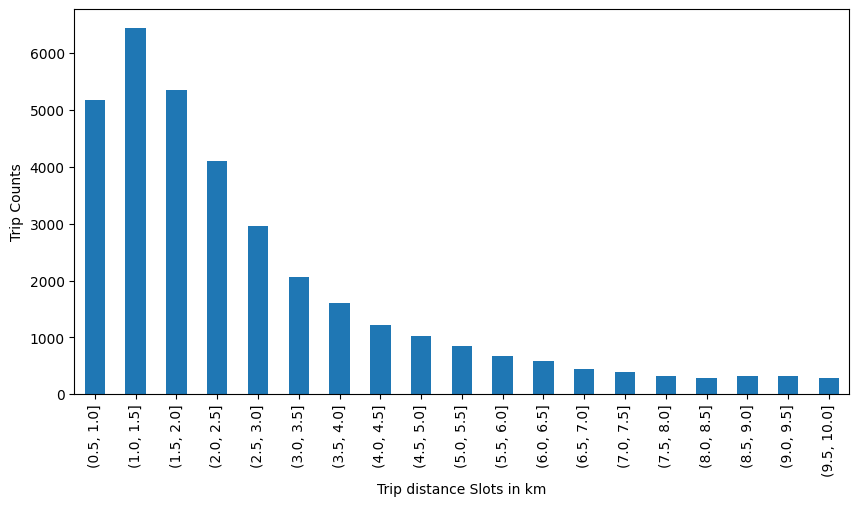

In [ ]:
plt.figure(figsize = (10,5))
nyc_taxi.distance.groupby(pd.cut(nyc_taxi.distance, np.arange(0.5,10.1,0.5))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

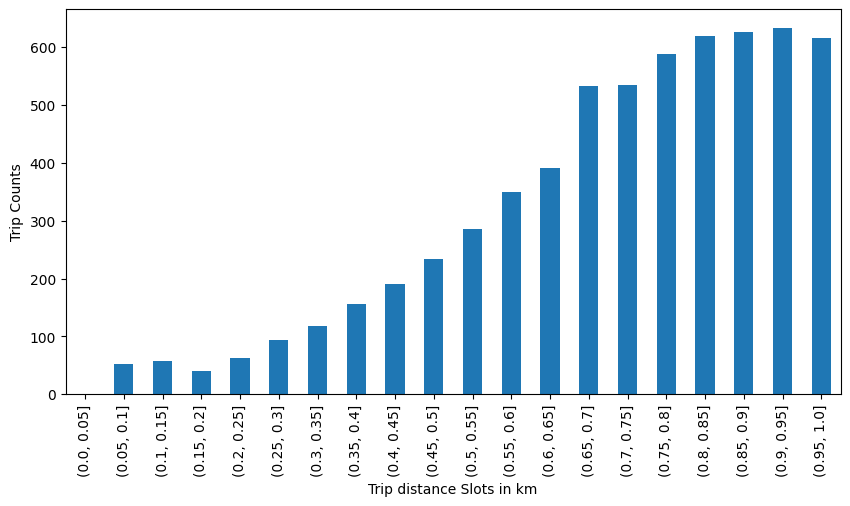

In [ ]:
#Barplot of distance from 0 to 1 km
plt.figure(figsize = (10,5))
nyc_taxi.speed.groupby(pd.cut(nyc_taxi.distance, np.arange(0,1.05,0.05))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

In [ ]:
nyc_taxi = nyc_taxi[nyc_taxi['distance'] <= 100]

In [ ]:
nyc_taxi.distance.max()

45.11627220140554

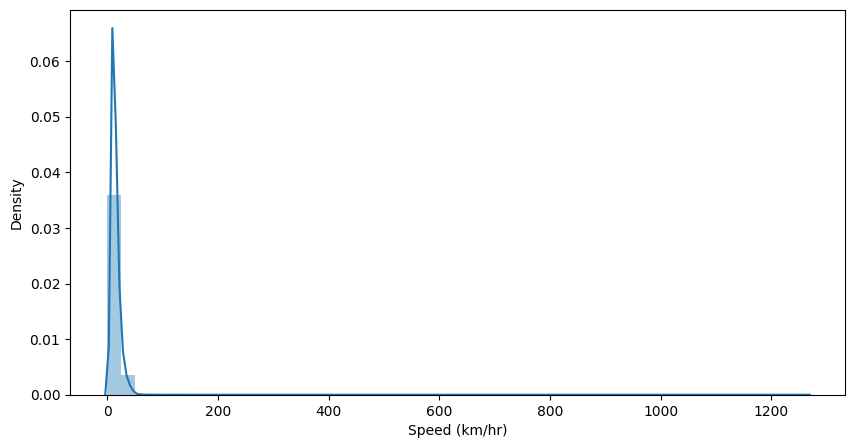

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(nyc_taxi['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

In [ ]:
nyc_taxi.speed.max()

1265.5166833552105

In [ ]:
nyc_taxi = nyc_taxi[nyc_taxi['speed']<=50]
nyc_taxi = nyc_taxi[nyc_taxi['speed']>=5]

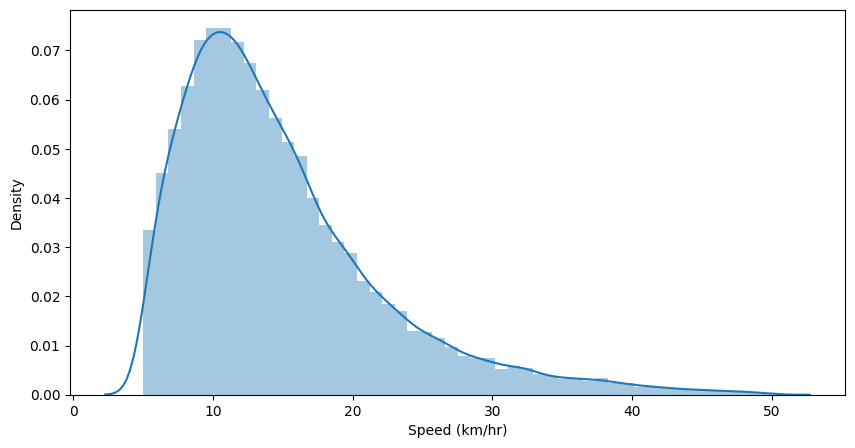

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(nyc_taxi['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

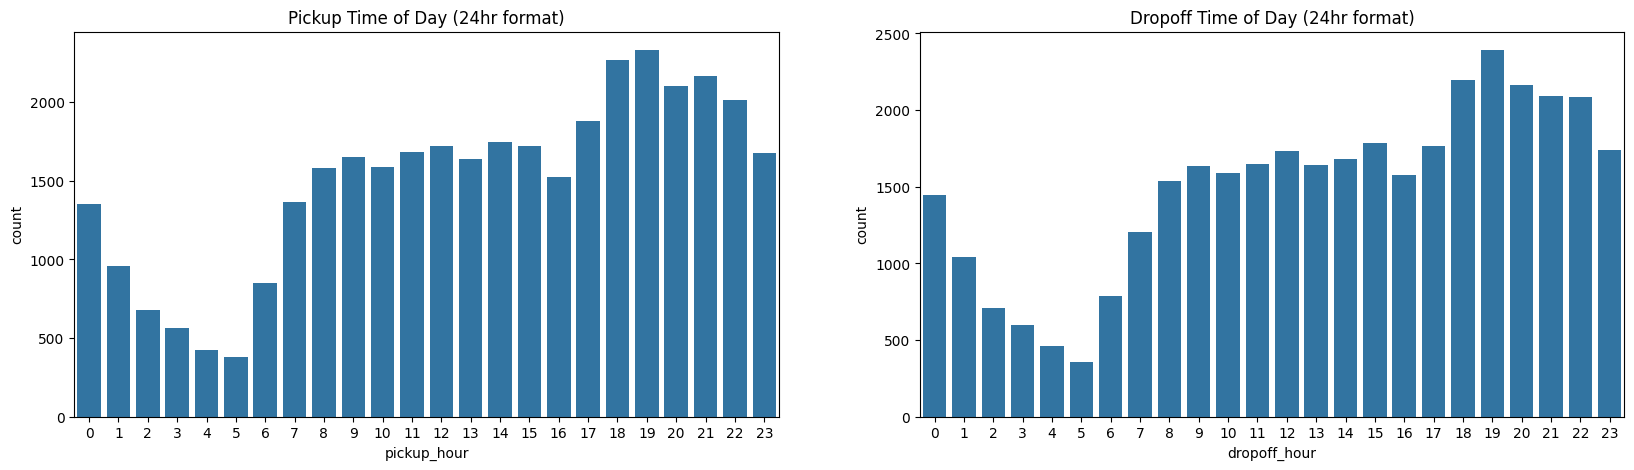

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day (24hr format)')
ax=sns.countplot(x="pickup_hour",data=nyc_taxi,ax=ax3)
ax4.set_title('Dropoff Time of Day (24hr format)')
ax=sns.countplot(x="dropoff_hour",data=nyc_taxi,ax=ax4)

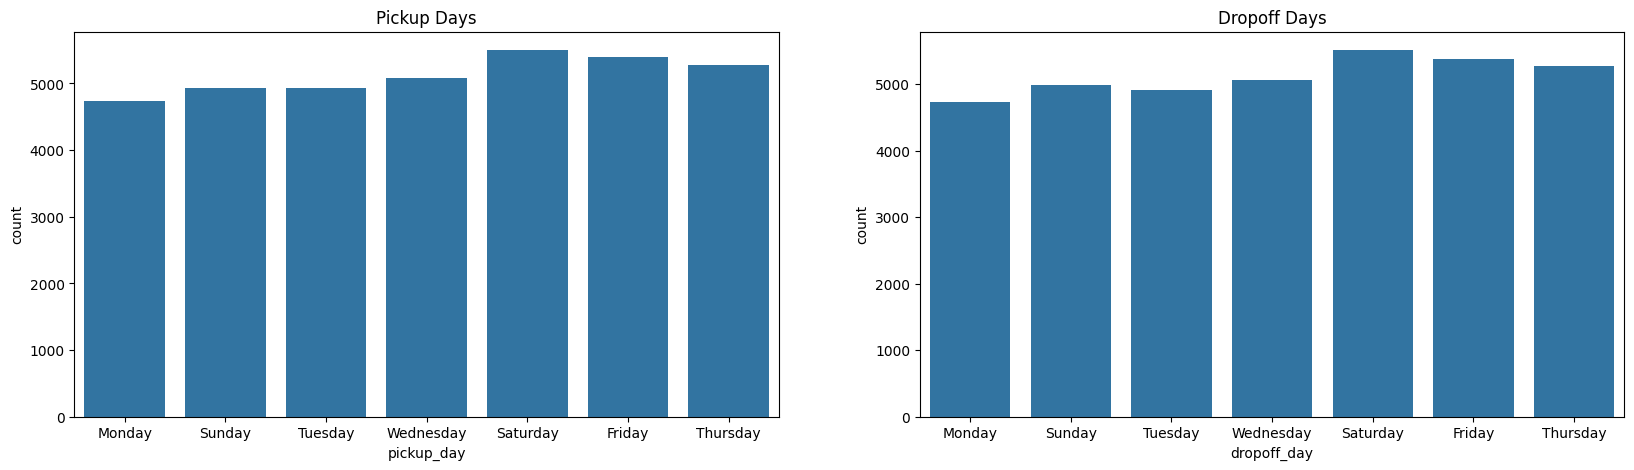

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=nyc_taxi,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=nyc_taxi,ax=ax2)

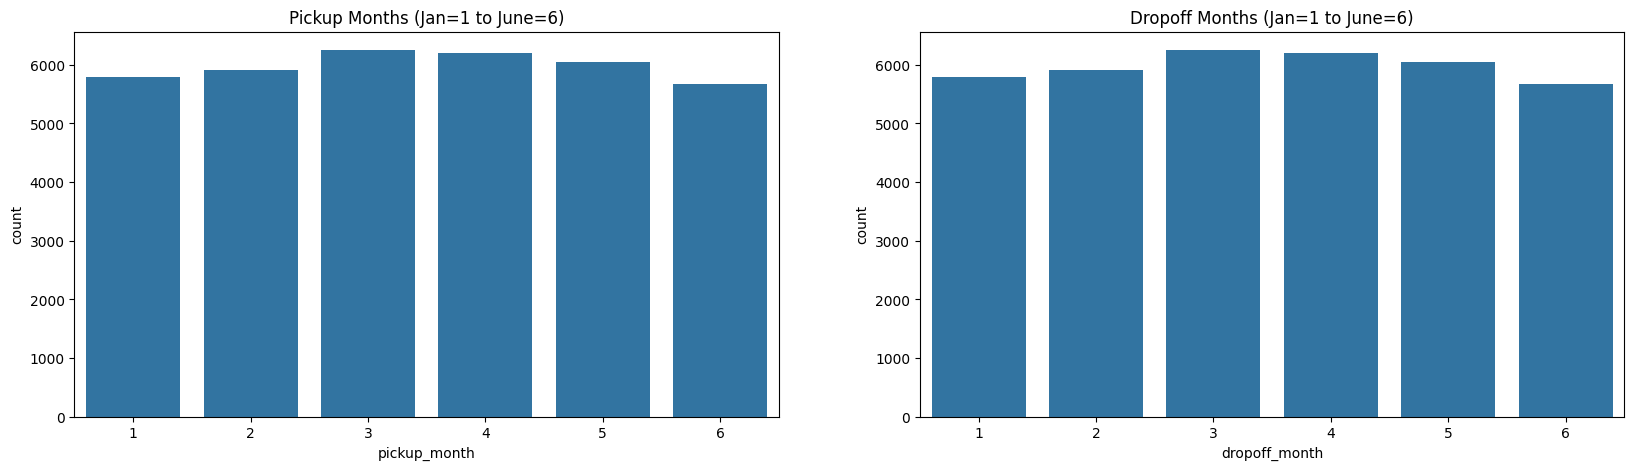

In [ ]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Months (Jan=1 to June=6)')
ax=sns.countplot(x="pickup_month",data=nyc_taxi,ax=ax1)
ax2.set_title('Dropoff Months (Jan=1 to June=6)')
ax=sns.countplot(x="dropoff_month",data=nyc_taxi,ax=ax2)

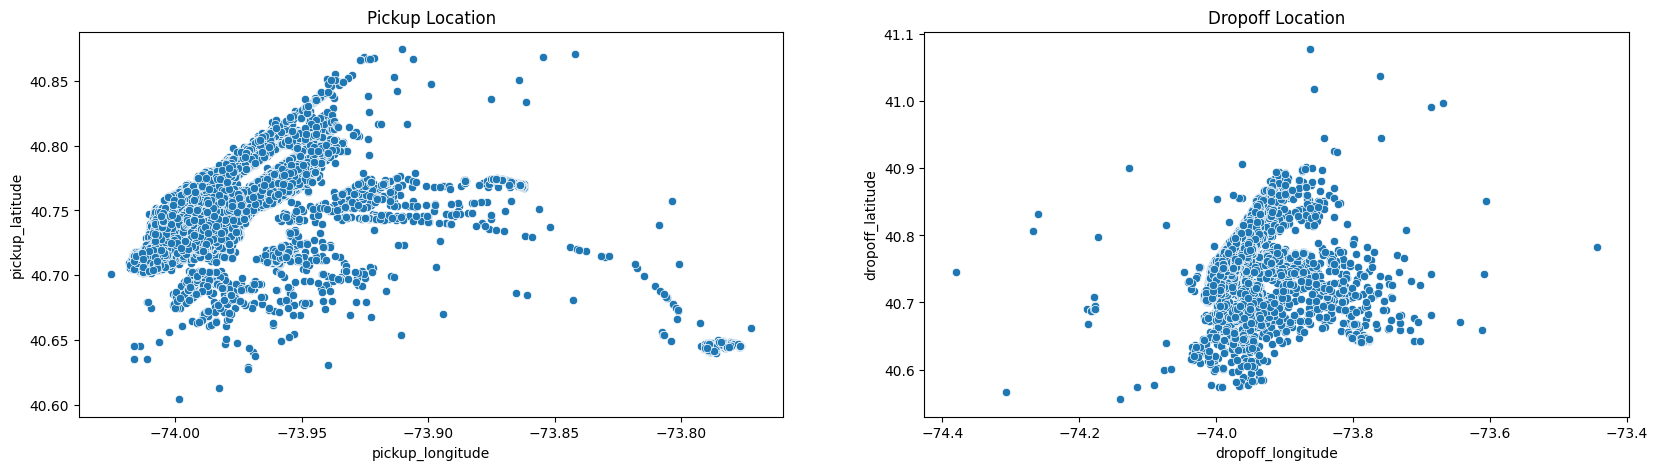

In [ ]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Location')
ax=sns.scatterplot(x=nyc_taxi.pickup_longitude,y=nyc_taxi.pickup_latitude,ax=ax3)
ax4.set_title('Dropoff Location')
ax=sns.scatterplot(x=nyc_taxi.dropoff_longitude,y=nyc_taxi.dropoff_latitude,ax=ax4)

<Figure size 1000x500 with 0 Axes>

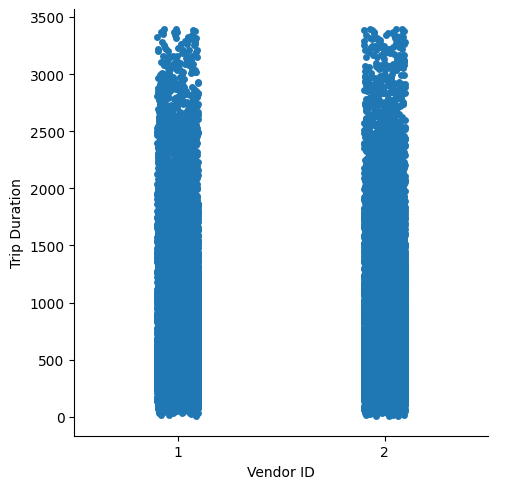

In [ ]:
plt.figure(figsize = (10,5))
sns.catplot(y='trip_duration',x='vendor_id',data=nyc_taxi,estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

<Figure size 1000x500 with 0 Axes>

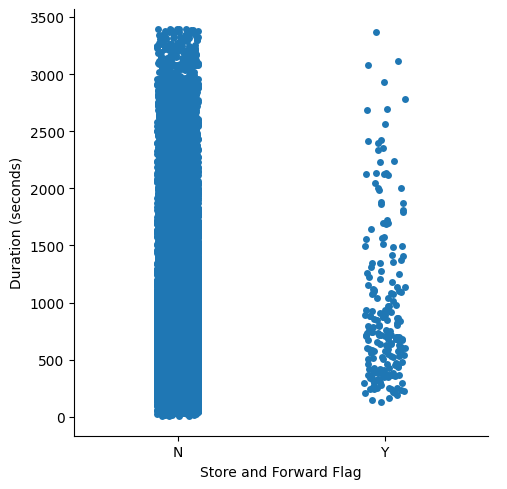

In [ ]:
plt.figure(figsize = (10,5))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=nyc_taxi,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

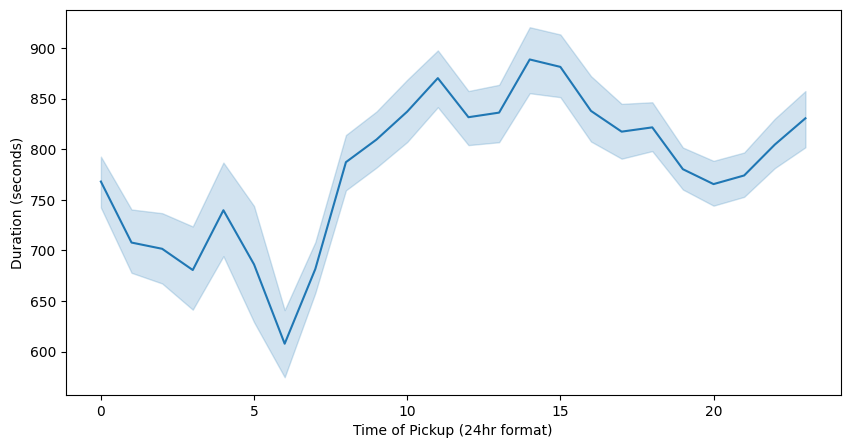

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=nyc_taxi)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

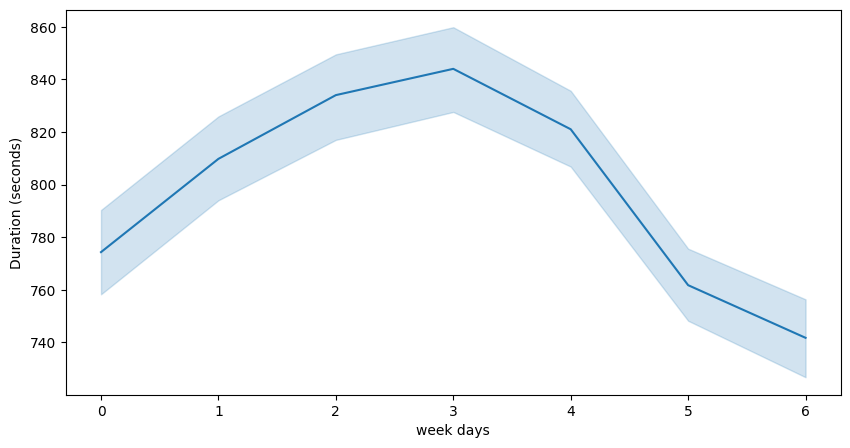

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_day_no',y='trip_duration',data = nyc_taxi)
plt.ylabel('Duration (seconds)')
plt.xlabel('week days')
plt.show()

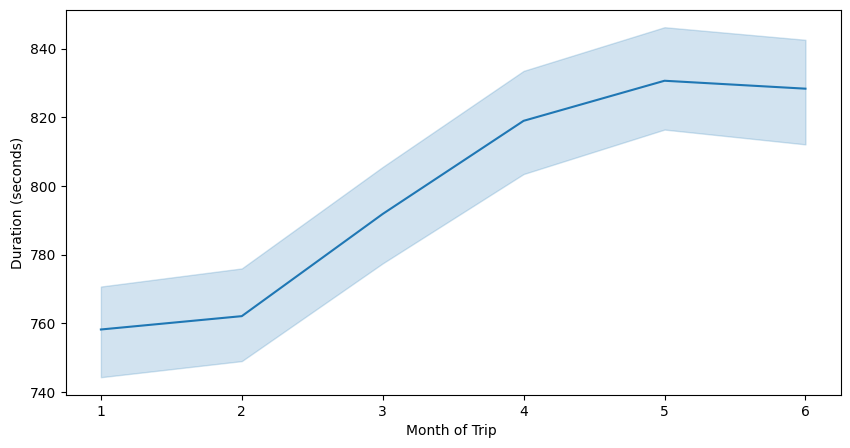

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_month',y='trip_duration', data = nyc_taxi)
plt.ylabel('Duration (seconds)')
plt.xlabel('Month of Trip ')
plt.show()

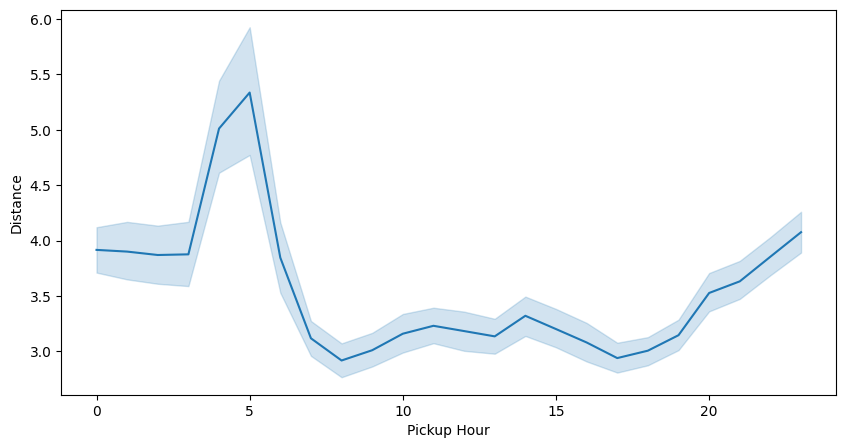

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=nyc_taxi)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

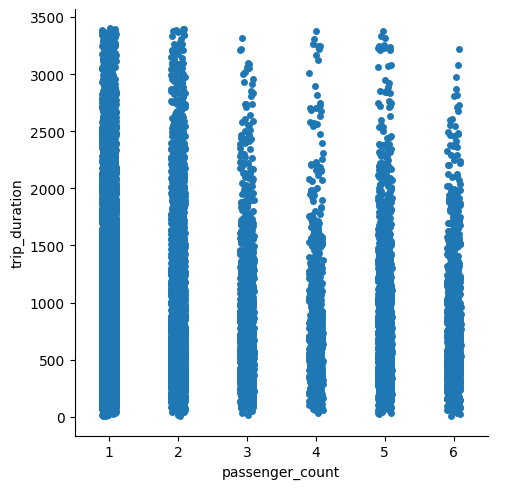

In [ ]:
sns.catplot(y='trip_duration',x='passenger_count',data=nyc_taxi,kind='strip')

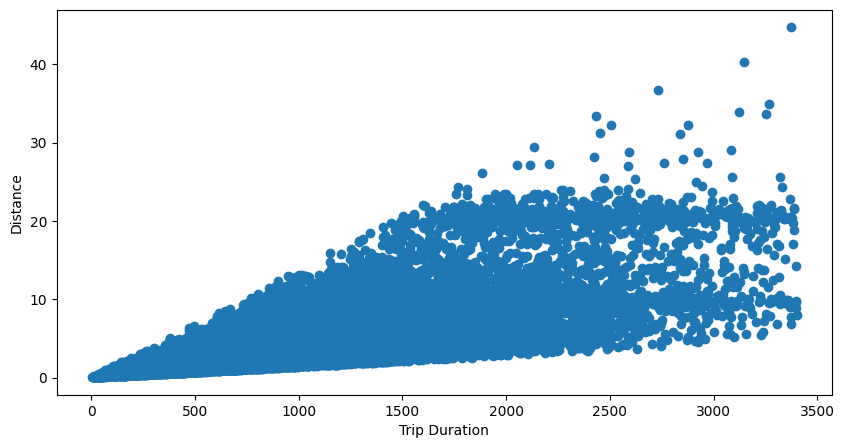

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(x='trip_duration', y='distance',data=nyc_taxi)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()

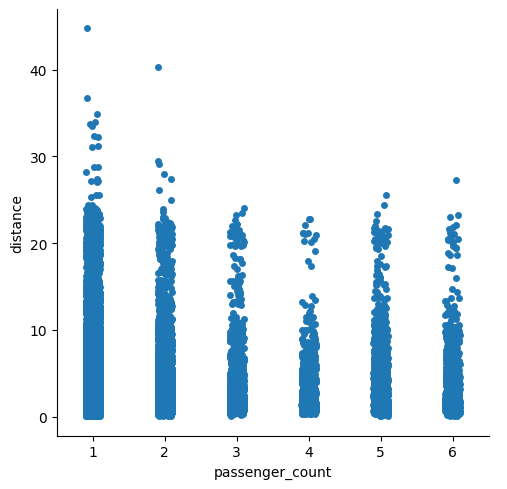

In [ ]:
sns.catplot(y='distance',x='passenger_count',data=nyc_taxi,kind='strip')

<Axes: xlabel='pickup_month', ylabel='distance'>

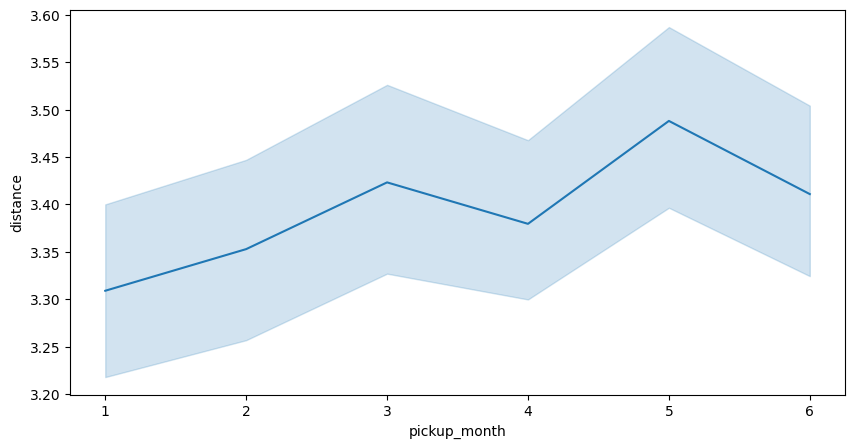

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_month',y='distance',data= nyc_taxi)

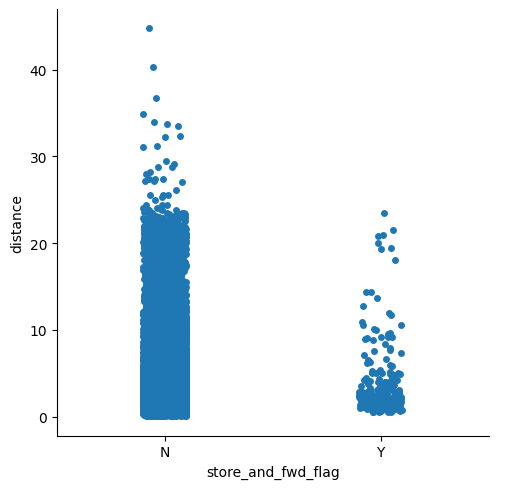

In [ ]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=nyc_taxi,kind='strip')

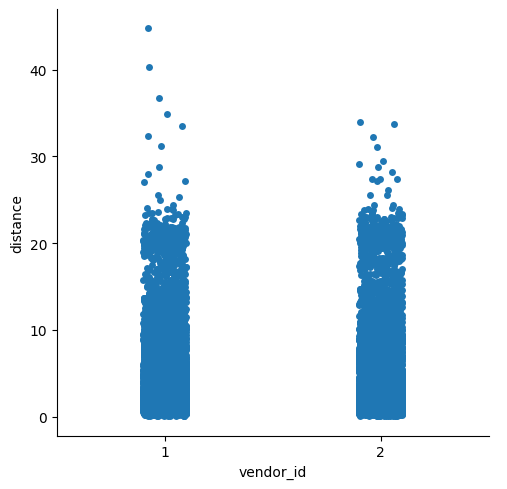

In [ ]:
sns.catplot(y='distance',x='vendor_id',data=nyc_taxi,kind='strip')

In [ ]:
nyc_taxi.head(2)

list(nyc_taxi)

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'pickup_day',
 'dropoff_day',
 'pickup_day_no',
 'dropoff_day_no',
 'pickup_hour',
 'dropoff_hour',
 'pickup_month',
 'dropoff_month',
 'distance',
 'speed',
 'pickup_timeofday',
 'dropoff_timeofday']

In [ ]:
nyc_taxi = pd.get_dummies(nyc_taxi, columns=["store_and_fwd_flag", "pickup_timeofday","dropoff_timeofday"], prefix=["store", "pickup","dropoff"])

In [ ]:
nyc_taxi

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,store_N,store_Y,pickup_Afternoon,pickup_Evening,pickup_Late night,pickup_Morning,dropoff_Afternoon,dropoff_Evening,dropoff_Late night,dropoff_Morning
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455.0,...,True,False,False,True,False,False,False,True,False,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663.0,...,True,False,False,False,True,False,False,False,True,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124.0,...,True,False,False,False,False,True,True,False,False,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429.0,...,True,False,False,True,False,False,False,True,False,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435.0,...,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38116,id2855173,2,2016-02-12 01:14:28,2016-02-12 01:16:39,1,-73.984474,40.745907,-73.989929,40.750652,131.0,...,True,False,False,False,True,False,False,False,True,False
38118,id2138261,1,2016-03-24 20:41:07,2016-03-24 20:48:50,1,-73.983650,40.738228,-73.974907,40.750740,463.0,...,True,False,False,True,False,False,False,True,False,False
38119,id3498437,1,2016-04-11 10:20:13,2016-04-11 10:50:55,1,-73.981911,40.756802,-73.885284,40.772423,1842.0,...,True,False,False,False,False,True,False,False,False,True
38120,id1814715,1,2016-05-10 09:17:23,2016-05-10 09:26:45,1,-73.991417,40.750454,-74.004692,40.725559,562.0,...,True,False,False,False,False,True,False,False,False,True


In [ ]:
nyc_taxi = pd.get_dummies(nyc_taxi, columns=["store_and_fwd_flag", "pickup_timeofday","dropoff_timeofday"], prefix=["store", "pickup","dropoff"])

NameError: name 'pd' is not defined

In [ ]:
independent_variables=['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','distance', 'pickup_hour']

dependent_variables = 'trip_duration'